<a href="https://colab.research.google.com/github/SaeidAbdolian/Mini-projects-of-images-processing/blob/main/Piecewise-Linear/Piecewise_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Piecewise Linear

Traditionally, a grayscale image is represented as a rectangular array whose internal values describe a discrete level of intensity or luminance denoted as pixel. Due to its structure and complete compatibility with matrix operators, this representation is the most widely used in image processing. Although the strong robustness of this standard is not in question, it is always enriching to have an alternative description format in order to provide not only a different image representation scheme but also an additional approach to image processing.

Piece-wise Linear Transformation is type of gray level transformation that is used for image enhancement. It is a spatial domain method. It is used for manipulation of an image so that the result is more suitable than the original for a specific application.

Some commonly used piece-wise linear transformations are:

###Contrast Stretching:
Low contrast image occur often due to improper illumination or non-linearly or small dynamic range of an imaging sensor. It increases the dynamic range of grey levels in the image.

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20191205151359/Capture267.png" width="50%">

###Clipping:
A special case of contrast stretching is clipping where l=n=0. It is used for noise reduction when the input signal is known. It puts all grey levels below r1 to black(0) and above r2 to white(1).

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20191205151438/Capture1105.png" width="50%">

Thresholding:
Another special case of contrast stretching is thresholding where l=m=t. It is also used for noise reduction. It preserves the grey levels beyond r1.

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20191205151527/Capture268.png" width="50%">

###Grey level slicing:
Highlighting a specific range of grey level in an image.

###Case-I:
+ To display a high value for all grey levels in the range of interest.
+ To display a low value for all grey levels.

###Case-II:
+ Brighten the desired range og grey level.
+ Preserve the background quality in the range.

###Bit Extraction:
An 8-bit image can be represented in the form of bit plane. Each plane represents one bit of all pixel values. Bit plane 7 contains the most significant bit (MSB) and bit plane 0 contains least significant bit (LSB). The 4 MSB planes contains most of visually significant data. This technique is useful for image compression and steganography.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def pixelVal(pix, r1, s1, r2, s2): 
    if (0 <= pix and pix <= r1): 
        return (s1 / r1)*pix 
    elif (r1 < pix and pix <= r2): 
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1 
    else: 
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2 

In [3]:
!wget "https://i.pinimg.com/originals/46/36/d3/4636d34f40f37a4bf056bd373e25afd4.jpg" -O AMOL_IRAN.jpg

--2020-12-15 20:36:40--  https://i.pinimg.com/originals/46/36/d3/4636d34f40f37a4bf056bd373e25afd4.jpg
Resolving i.pinimg.com (i.pinimg.com)... 104.18.14.176, 104.18.15.176, 2600:1409:6800:18f::1931, ...
Connecting to i.pinimg.com (i.pinimg.com)|104.18.14.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 142536 (139K) [image/jpeg]
Saving to: ‘AMOL_IRAN.jpg’

AMOL_IRAN.jpg       100%[===================>] 139.20K  --.-KB/s    in 0.02s   

2020-12-15 20:36:40 (8.28 MB/s) - ‘AMOL_IRAN.jpg’ saved [142536/142536]



In [4]:
img = cv2.imread('./AMOL_IRAN.jpg') 
if len(img.shape) == 3:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [5]:
r1 = input('please type R1 value: 0<R1<255')
r1 = int(r1)

s1 = input('please type S1 value: 0<S1<255')
s1 = int(s1)

r2 = input('please type R2 value: 0<R2<255')
r2 = int(r2)

s2 = input('please type S2 value: 0<S2<255')
s2 = int(s2)

please type R1 value: 0<R1<25562
please type S1 value: 0<S1<255200
please type R2 value: 0<R2<2555
please type S2 value: 0<S2<255230


In [6]:
pixelVal_vec = np.vectorize(pixelVal) 
contrast_stretched = pixelVal_vec(img, r1, s1, r2, s2) 

<function matplotlib.pyplot.show>

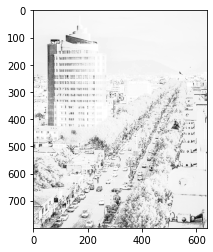

In [7]:
plt.imshow(contrast_stretched, cmap='gray')
plt.show